In [2]:
## imports

import pandas as pd
import nltk
from sentence_transformers import SentenceTransformer
from embeddings import * 
from user import *

# Create Semantic Clusters

## Load Data

In [3]:
import ast

In [4]:
df = pd.read_csv("vocab_with_embeddings.csv", encoding='utf-8', index_col=0, keep_default_na=False)
data = [ast.literal_eval(x) for x in df["en_embedding"]]

## Compute inertia

In [5]:
## more imports
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator

In [6]:
## compute intertia
inertias = []

for i in range(1,100):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

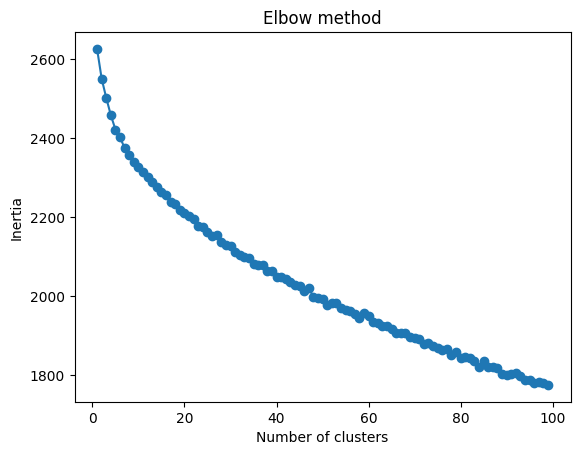

In [7]:
plt.plot(range(1,100), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [8]:
x = range(0, len(inertias))
kn = KneeLocator(x, inertias, curve='convex', direction='decreasing')
elbow_point = kn.knee ## figure out the actual elbow
print(elbow_point)

25


## Actual Clustering

In [9]:
## cluster based on intertia computed
kmeans = KMeans(n_clusters=elbow_point, random_state=42)
labels = kmeans.fit_predict(data)

In [10]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

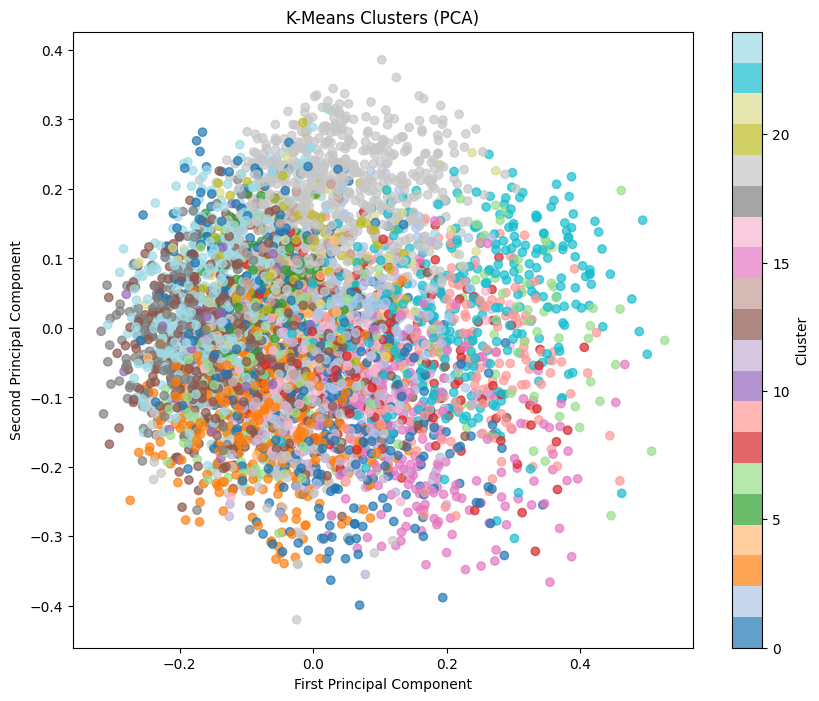

In [11]:
## show on a plane using pca
pca = PCA(n_components=2, random_state=42)
data_2d = pca.fit_transform(data)

plt.figure(figsize=(10, 8))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='tab20', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('K-Means Clusters (PCA)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [12]:
vocab_en = df["en"]
clusters = {}

for cluster_id in range(elbow_point):
    cluster_indices = np.where(labels == cluster_id)[0]
    clusters[cluster_id] = [vocab_en[i] for i in cluster_indices]

# print all clusters
for cluster_id, words in clusters.items():
    print(f"Cluster {cluster_id}: {words}")

Cluster 0: ['aircraft', 'approach', 'bicycle', 'bike', 'boat', 'bus', 'car', 'carry', 'change', 'channel', 'climb', 'convert', 'course', 'cross', 'cycle', 'destination', 'direction', 'distance', 'drag', 'drive', 'driver', 'driving', 'engine', 'exchange', 'exercise', 'expedition', 'flight', 'flow', 'flying', 'follow', 'helicopter', 'journey', 'jump', 'kilometre', 'lift', 'mile', 'mobile', 'motor', 'motorcycle', 'move', 'movement', 'pass', 'passage', 'passenger', 'path', 'phase', 'plane', 'port', 'progress', 'race', 'race', 'racing', 'railway', 'revolution', 'ride', 'road', 'round', 'route', 'routine', 'run', 'runner', 'running', 'sailing', 'shift', 'ship', 'skiing', 'slope', 'speed', 'stage', 'step', 'stream', 'street', 'switch', 'taxi', 'tour', 'tourist', 'track', 'trade', 'traffic', 'train', 'transfer', 'transform', 'transition', 'transport', 'travel', 'traveller', 'trend', 'trip', 'truck', 'tunnel', 'turn', 'vehicle', 'via', 'walk', 'way', 'wheel', 'accelerate', 'canal', 'carriage', 

In [1]:
for cluster_id, cluster in clusters.items():
    print(f"Cluster {cluster_id} length: {len(cluster)}")

NameError: name 'clusters' is not defined

## Generate Testing Items

In [1]:
import random

In [13]:
for cluster_id, cluster in clusters.items():
    print(f"Representative from Cluster {cluster_id}: {random.choice(cluster)}")

Representative from Cluster 0: follow
Representative from Cluster 1: philosophical
Representative from Cluster 2: displace
Representative from Cluster 3: reward
Representative from Cluster 4: yours
Representative from Cluster 5: twenty
Representative from Cluster 6: measure
Representative from Cluster 7: hard
Representative from Cluster 8: extend
Representative from Cluster 9: glory
Representative from Cluster 10: commentator
Representative from Cluster 11: casual
Representative from Cluster 12: stance
Representative from Cluster 13: character
Representative from Cluster 14: widow
Representative from Cluster 15: none
Representative from Cluster 16: newly
Representative from Cluster 17: leader
Representative from Cluster 18: distribute
Representative from Cluster 19: bean
Representative from Cluster 20: guerrilla
Representative from Cluster 21: silent
Representative from Cluster 22: prosecution
Representative from Cluster 23: computer
Representative from Cluster 24: pocket
